In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

plt.style.use('default')

sns.set(style='whitegrid')

In [2]:
df = pd.read_csv('data/events.csv', low_memory=False)

In [3]:
canales = df.loc[df['event'] == 'visited site'].dropna(axis=1).copy()
canales['timestamp'] = pd.to_datetime(canales['timestamp']).dt.date

In [4]:
canales['channel'].value_counts()

Paid        44193
Direct      18522
Organic     12348
Referral    11384
Social        846
Email          76
Unknown         9
Name: channel, dtype: int64

In [5]:
paid = canales.loc[canales['channel'] == 'Paid']['timestamp'].value_counts()
direct = canales.loc[canales['channel'] == 'Direct']['timestamp'].value_counts()
organic = canales.loc[canales['channel'] == 'Organic']['timestamp'].value_counts()
referral = canales.loc[canales['channel'] == 'Referral']['timestamp'].value_counts()
social = canales.loc[canales['channel'] == 'Social']['timestamp'].value_counts()
email = canales.loc[canales['channel'] == 'Email']['timestamp'].value_counts()

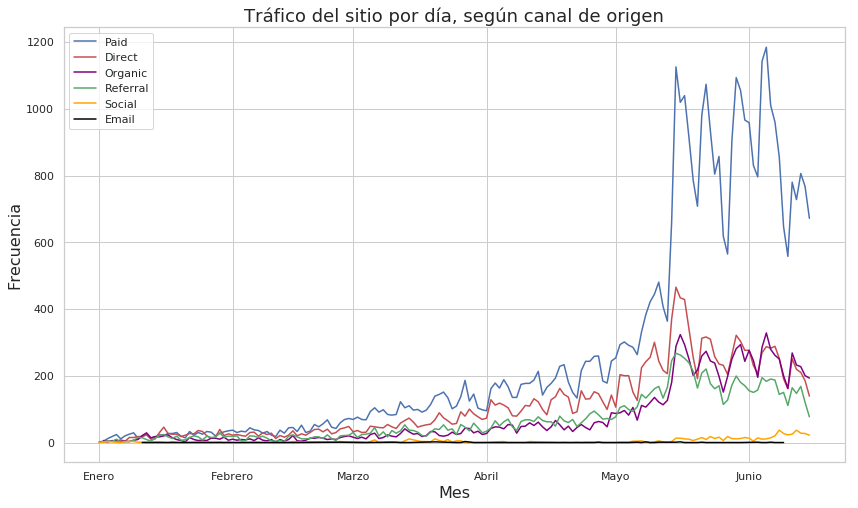

In [6]:
plt.figure(figsize=[14,8])
g = sns.lineplot(x=paid.index, y=paid.values, color='b')
g = sns.lineplot(x=direct.index, y=direct.values, color='r')
g = sns.lineplot(x=organic.index, y=organic.values, color='Purple')
g = sns.lineplot(x=referral.index, y=referral.values, color='g')
g = sns.lineplot(x=social.index, y=social.values, color='Orange')
g = sns.lineplot(x=email.index, y=email.values, color='Black')
g.set(xticklabels=['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio'])
g.set_title("Tráfico del sitio por día, según canal de origen", fontsize=18)
g.set_xlabel('Mes', fontsize=16)
g.set_ylabel('Frecuencia', fontsize=16)
g.legend(['Paid', 'Direct', 'Organic', 'Referral', 'Social', 'Email'])
plt.show()